#### 栈

* 先进后出
* 只允许在一端插入和删除数据

##### 时间复杂度
新增、删除：O(1)

##### JVM 内存管理的“堆栈”

JVM 内存管理中有个“堆栈”的概念。栈内存用来存储局部变量和方法调用，堆内存用来存储 Java 中的对象。那 JVM 里面的“栈”跟我们这里说的“栈”是不是一回事呢？如果不是，那它为什么又叫作“栈”呢？

##### 函数调用栈

为什么函数要用栈来保存临时变量？

其实，我们不一定非要用栈来保存临时变量，只不过如果这个函数调用符合后进先出的特性，用栈这种数据结构来实现，是最顺理成章的选择。

从调用函数进入被调用函数，对于数据来说，变化的是什么呢？是作用域。所以根本上，只要能保证每进入一个新的函数，都是一个新的作用域就可以。而要实现这个，用栈就非常方便。在进入被调用函数的时候，分配一段栈空间给这个函数的变量，在函数结束的时候，将栈顶复位，正好回到调用函数的作用域内。


```
int main() {
   int a = 1; 
   int ret = 0;
   int res = 0;
   ret = add(3, 5);
   res = a + ret;
   printf("%d", res);
   reuturn 0;
}

int add(int x, int y) {
   int sum = 0;
   sum = x + y;
   return sum;
}
```

* 操作系统给每个线程分配了一块 *独立* 的内存空间，这块内存被组织成 "栈" 这种结构，用来存储函数调用时的临时变量
* 每进入一个函数，就会将临时变量作为一个栈帧入栈，当被调用函数执行完成，返回之后，将这个函数对应的栈帧出栈

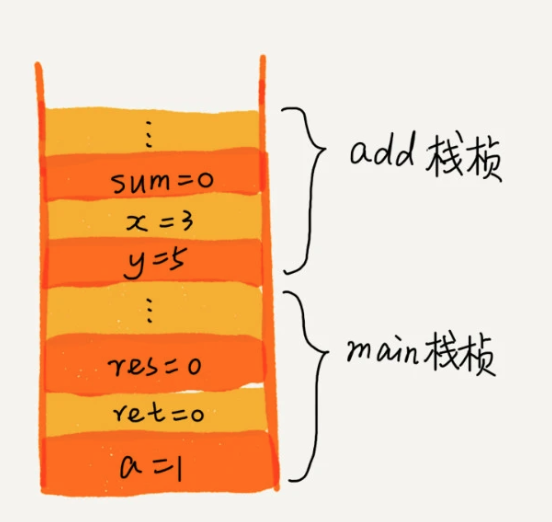

##### 栈在表达式求值中的应用
1. 编译器就是通过两个栈来实现的。*其中一个保存操作数的栈，另一个是保存运算符的栈。*
2. 我们从左向右遍历表达式，
   1. 当遇到数字，我们就直接压入操作数栈；
   2. 当遇到运算符，就与运算符栈的栈顶元素进行比较。
      1. 如果比运算符栈顶元素的优先级高，就将当前运算符压入栈；
      2. 如果比运算符栈顶元素的优先级低或者相同，从运算符栈中取栈顶运算符，从操作数栈的栈顶取 2 个操作数，然后进行计算，再把计算完的结果压入操作数栈，继续比较。

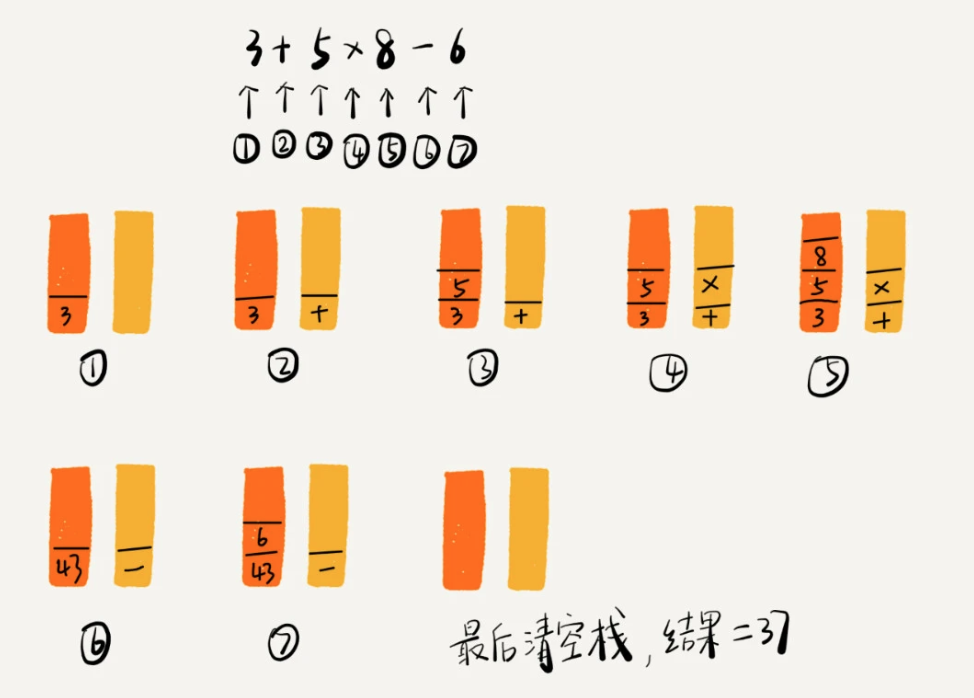

##### 栈在括号匹配中的应用
1. 我们用栈来保存未匹配的左括号，从左到右依次扫描字符串。
2. 当扫描到左括号时，则将其压入栈中；当扫描到右括号时，从栈顶取出一个左括号。如果能够匹配，比如“(”、“)”匹配，“[”、“]”匹配，“{”、“}”匹配，则继续扫描剩下的字符串。如果扫描的过程中，遇到不能配对的右括号，或者栈中没有数据，则说明为非法格式。
3. 当所有的括号都扫描完成之后，如果栈为空，则说明字符串为合法格式；否则，说明有未匹配的左括号，为非法格式

##### 浏览器前进后退
1. 用两个栈，X 和 Y。
2. 我们把首次浏览的页面依次压入栈 X，当点击后退按钮时，再依次从栈 X 中出栈，并将出栈的数据依次放入栈 Y。
3. 当我们点击前进按钮时，我们依次从栈 Y 中取出数据，放入栈 X 中。当栈 X 中没有数据时，那就说明没有页面可以继续后退浏览了。当栈 Y 中没有数据，那就说明没有页面可以点击前进按钮浏览了。

X 的栈顶元素即为当前访问的页面
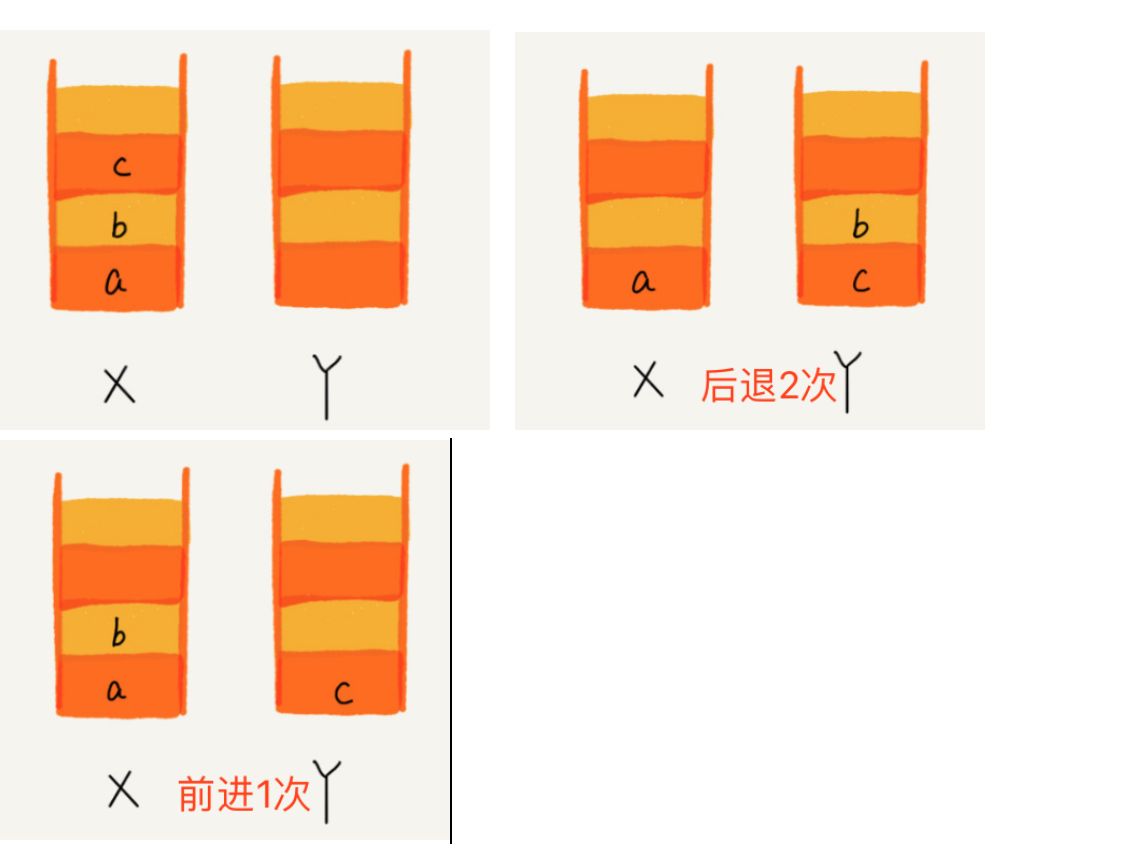

In [ ]:
'''
leetcode
20 valid parentheses

Input: s = "()"
Output: true

Input: s = "(]"
Output: false
'''

class Solution:
    def isValid(self, s: str) -> bool:
        stack = []
        match = {'(': ')', '{': '}', '[': ']'}


        for v in s:
            if v in match:
                stack.append(v)
                continue
            if len(stack) == 0 or  v != match[stack.pop()] :
                return False

        if len(stack) == 0:
            return True
        return False
        

In [ ]:
'''
leetcode
844 backspace string compare

Given two strings s and t, return true if they are equal when both are typed into empty text editors. '#' means a backspace character.

Note that after backspacing an empty text, the text will continue empty.

Example 1:

Input: s = "ab#c", t = "ad#c"
Output: true
Explanation: Both s and t become "ac".
Example 2:

Input: s = "ab##", t = "c#d#"
Output: true
Explanation: Both s and t become "".
Example 3:

Input: s = "a#c", t = "b"
Output: false
Explanation: s becomes "c" while t becomes "b".
'''

class Solution:
    def backspaceCompare(self, s: str, t: str) -> bool:
        sstack = []
        tstack = []

        for v in s:
            if v == '#':
                sstack = sstack[0:-1]# sstack.pop() 为空时pop会报异常
            else:
                sstack.append(v)
        
        for v in t:
            if v == '#':
                tstack = tstack[0:-1]
            else:
                tstack.append(v)

        
        return sstack == tstack # python 可以直接用 == 比较两个数组是否相同
        

        

[]

In [ ]:
'''
leetcode

155 min stack

Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.

Implement the MinStack class:

MinStack() initializes the stack object.
void push(int val) pushes the element val onto the stack.
void pop() removes the element on the top of the stack.
int top() gets the top element of the stack.
int getMin() retrieves the minimum element in the stack.
You must implement a solution with O(1) time complexity for each function.

 

Example 1:

Input
["MinStack","push","push","push","getMin","pop","top","getMin"]
[[],[-2],[0],[-3],[],[],[],[]]

Output
[null,null,null,null,-3,null,0,-2]

Explanation
MinStack minStack = new MinStack();
minStack.push(-2);
minStack.push(0);
minStack.push(-3);
minStack.getMin(); // return -3
minStack.pop();
minStack.top();    // return 0
minStack.getMin(); // return -2


'''

class MinStack:

    def __init__(self):
        self.stack = [] # 二维数组 [当前入栈的值][当前的最小值]
        # 或者拆成两个stask
        # self.stack = []
        # self.minStack = []
        

    def push(self, val: int) -> None:
        currMin = self.getMin()
        if currMin is None or currMin > val: # if not currMin X-> currMin=0也能命中
            currMin = val
        
        self.stack.append((val, currMin))
        

    def pop(self) -> None:
        if not self.stack: return None
        self.stack.pop()
        return 
        

    def top(self) -> int:
        if not self.stack: return None
        return self.stack[-1][0]
        

    def getMin(self) -> int:
        if not self.stack: return None
        return self.stack[-1][1]
        


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

1

In [44]:
'''
leetcode 
224 Basic calulator
Hard

Given a string s representing a valid expression, implement a basic calculator to evaluate it, and return the result of the evaluation.

Note: You are not allowed to use any built-in function which evaluates strings as mathematical expressions, such as eval().

Example 1:

Input: s = "1 + 1"
Output: 2
Example 2:

Input: s = " 2-1 + 2 "
Output: 3
Example 3:

Input: s = "(1+(4+5+2)-3)+(6+8)"
Output: 23

Input s = "2147483647" XXXX
'''
from typing import List, Optional

class Solution:
    def pop(self, v:List):
        if len(v) == 0:
            return None
        return v.pop()

    def opCal(self, x:int, y:int, op:str) ->int:
        if op == '-':
            return x - y
        if op == "+":
            return x + y
    
    def partionCal(self, numStack:List, opStack:List) -> int:
        y = self.pop(numStack)
        x = self.pop(numStack)     
        op = self.pop(opStack) 
        res = y

        while  x !=  None and y != None:                   
            res = self.opCal(x,y,op)
            y = res
            op = self.pop(opStack)  
            if op == None or op == '(':
                break
            x = self.pop(numStack)      
        return res
    
    def calculate(self, s: str) -> int:
        numStack = []
        opStack = [] 
        if s[0] == '-':
            s = '0' + s
        s = s.replace(' ', '')

        num = 0
        index = -1
        for i in range(len(s)):
            index +=1
            if index >= len(s):
                break
            v = s[index]
            # '11' -> 11 ?? TODO
            if v.isdigit():
                num = num*10+int(v)
                # numStack.append(int(v))
                continue
            if v == "(":
                opStack.append(v)
                continue
            if v in '+-': # 加上后面一位数进行运算
                opStack.append(v)
                t = s[index+1]
                if t.isdigit():
                    index += 1
                    numStack.append(int(s[index]))
                    res = self.partionCal(numStack, opStack)
                    numStack.append(res)
                continue
            if v == ')':   
                res = self.partionCal(numStack, opStack)
                numStack.append(res)
                continue
            
        
        res = self.partionCal(numStack, opStack)  
        return res

        

s = Solution()
# res = s.calculate("1 + 1")
# res = s.calculate("(1+(4+5+2)-3)+(6+8)")
res = s.calculate(" 2-1 + 2 ")
print(res)



            
            

        


3


In [46]:
'''
leetcode 

682 baseball game

An integer x.
Record a new score of x.
'+'.
Record a new score that is the sum of the previous two scores.
'D'.
Record a new score that is the double of the previous score.
'C'.
Invalidate the previous score, removing it from the record.

Input: ops = ["5","-2","4","C","D","9","+","+"]
Output: 27
Explanation:
"5" - Add 5 to the record, record is now [5].
"-2" - Add -2 to the record, record is now [5, -2].
"4" - Add 4 to the record, record is now [5, -2, 4].
"C" - Invalidate and remove the previous score, record is now [5, -2].
"D" - Add 2 * -2 = -4 to the record, record is now [5, -2, -4].
"9" - Add 9 to the record, record is now [5, -2, -4, 9].
"+" - Add -4 + 9 = 5 to the record, record is now [5, -2, -4, 9, 5].
"+" - Add 9 + 5 = 14 to the record, record is now [5, -2, -4, 9, 5, 14].
The total sum is 5 + -2 + -4 + 9 + 5 + 14 = 27.
'''

class Solution:
    def calPoints(self, operations: List[str]) -> int:
        numStack = []
        for v in operations:
            if v.isdigit() or v.split('-')[-1].isdigit(): # '-2'.isdigit() -> False
                numStack.append(int(v))
                continue
            if v == '+':
                last = int(numStack.pop())
                last2 = int(numStack.pop())
                newLast = last + last2
                numStack.append(last2)
                numStack.append(last)
                numStack.append(newLast)
                continue
            if v == 'C':
                numStack.pop()
                continue
            if v == "D":
                last = int(numStack.pop())
                newLast = last * 2
                numStack.append(last)
                numStack.append(newLast)
                continue
        
        sum = 0
        for v in numStack:
            sum += v
        return sum
        

-4

In [49]:
'''
leetcode 

496. Next Greater Element I
Easy
You are given two arrays (without duplicates) nums1 and nums2 where nums1’s elements are subset of nums2. Find all the next greater numbers for nums1's elements in the corresponding places of nums2.
The Next Greater Number of a number x in nums1 is the first greater number to its right in nums2. If it does not exist, output -1 for this number.
Example 1:
Input: nums1 = [4,1,2], nums2 = [1,3,4,2].
Output: [-1,3,-1]
Explanation:
    For number 4 in the first array, you cannot find the next greater number for it in the second array, so output -1.
    For number 1 in the first array, the next greater number for it in the second array is 3.
    For number 2 in the first array, there is no next greater number for it in the second array, so output -1.

'''

class Solution:
    def nextGreaterElement(self, nums1: List[int], nums2: List[int]) -> List[int]:
        greater = {}
        for i in range(len(nums2)-1):
            for j in range(i+1, len(nums2)):
                if nums2[i] < nums2[j]:
                    greater[nums2[i]] = nums2[j]
                    break
        return [greater[n] if n in greater else -1 for n in nums1]
    
    def nextGreaterElement_2( nums1, nums2):
        greater, stack = {}, []
        for n in nums2:
            while stack and n > stack[-1]:
                greater[stack.pop()] = n
            stack.append(n)
        return [greater[n] if n in greater else -1 for n in nums1]
        


5
1
2
3
4


[3, -1]

In [ ]:
'''
leetcode 
71 simplify path

In Unix-style file system context, a single period '.' signifies the current directory, a double period ".." denotes moving up one directory level, and multiple slashes such as "//" are interpreted as a single slash. In this problem, treat sequences of periods not covered by the previous rules (like "...") as valid names for files or directories.



'''
class Solution:
    def simplifyPath(self, path: str) -> str:
        path_sub = path.split('/')
        path_stack = []
        for s in path_sub:
            if s == '.' or s == '':
                continue
            if s == '..':
                if path_stack: path_stack.pop()
                continue           
            path_stack.append(s)
        
        return '/' + '/'.join(path_stack)
        

In [53]:
'''
leetcode
150

Example 1:

Input: tokens = ["2","1","+","3","*"]
Output: 9
Explanation: ((2 + 1) * 3) = 9
Example 2:

Input: tokens = ["4","13","5","/","+"]
Output: 6
Explanation: (4 + (13 / 5)) = 6
'''
class Solution:

    def cal(self, a, b, Operator):
        if Operator == '+':
            return a + b
        elif Operator == '-':
            return a - b
        elif Operator == '*':
            return a * b
        return int(a / b)

        
    def evalRPN(self, tokens: List[str]) -> int:
        numsStack = []
        for t in tokens:
            if t in '+-*/': # if len(token) == 1 and ord(token) < 48:
                y = numsStack.pop()
                x = numsStack.pop()
                res = self.cal(x, y, t)
                numsStack.append(res)
            else:
                numsStack.append(int(t))

        return numsStack.pop()

        

In [ ]:
'''
224. Basic Calculator
Hard
Implement a basic calculator to evaluate a simple expression string.
The expression string may contain open ( and closing parentheses ), the plus + or minus sign -, non-negative integers and empty spaces .
Example 1:
Input: "1 + 1"
Output: 2

Example 2:
Input: " 2-1 + 2 "
Output: 3
Example 3:
Input: "(1+(4+5+2)-3)+(6+8)"
Output: 23
'''

class Solution:
    def calculate(self, s: str) -> int:
        num = 0
        sign = 1
        res = 0
        stack = []
        for c in s:
            if c.isdigit():
                # '98' -> 98
                num = num * 10 + int(c)
            elif c in '-+':
                res += num * sign
                sign = -1 if c == '-' else 1
                num = 0
            elif c == '(':
                stack.append(res)
                stack.append(sign)
                res = 0
                sign = 1
            elif c == ')':
                res += sign * num
                res *= stack.pop()
                res += stack.pop()
                num = 0
        return res + num * sign